# Stroke Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Exploratory Data Analysis

In [7]:
import warnings
warnings.filterwarnings('ignore')
df['is_stroke'] = ' '
for i in range(len(df)):
    if df['stroke'][i] == 1:
        df['is_stroke'][i] = 'Yes'
    else:
        df['is_stroke'][i] = 'No'

In [8]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke is_stroke  
0       1       Yes  
1       1       Yes  
2       1       Yes  
3       1       Yes  
4       1       Yes

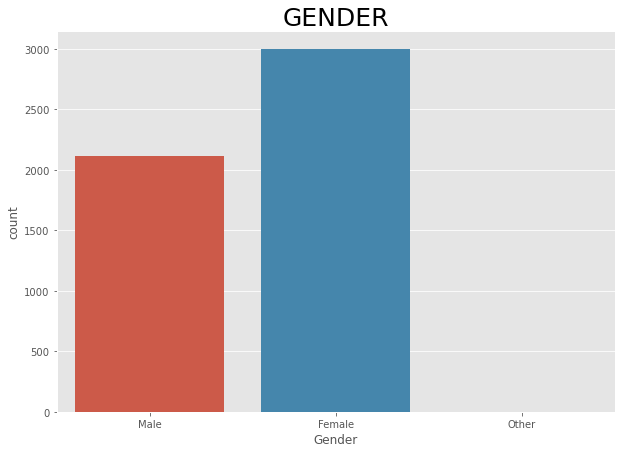

In [9]:
plt.figure(figsize = (10,7))
sns.countplot(x = df['gender'])
plt.title('GENDER', fontsize = 25)
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

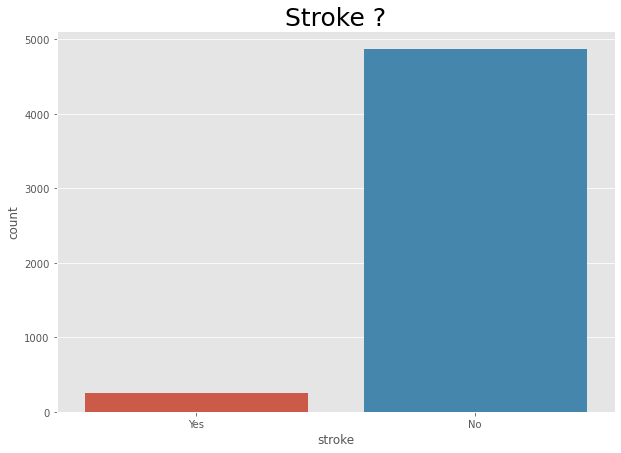

In [10]:
plt.figure(figsize = (10,7))
sns.countplot(x = df['is_stroke'])
plt.title('Stroke ?', fontsize = 25)
plt.xlabel('stroke')
plt.ylabel('count')
plt.show()

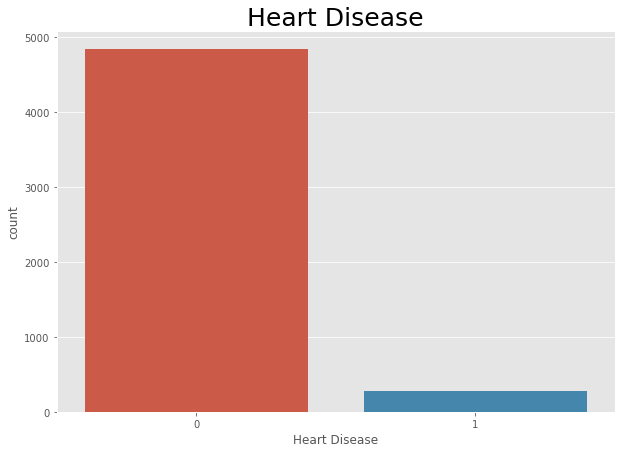

In [11]:
plt.figure(figsize = (10,7))
sns.countplot(x = df['heart_disease'])
plt.title('Heart Disease', fontsize = 25)
plt.xlabel('Heart Disease')
plt.ylabel('count')
plt.show()

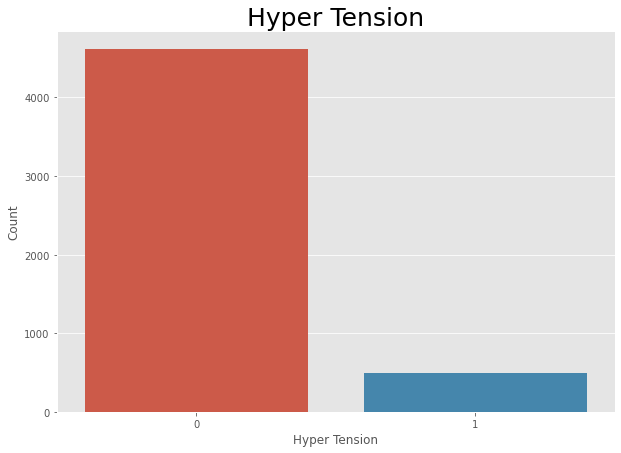

In [12]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df['hypertension'])
plt.title('Hyper Tension', fontsize = 25)
plt.xlabel('Hyper Tension')
plt.ylabel('Count')
plt.show()

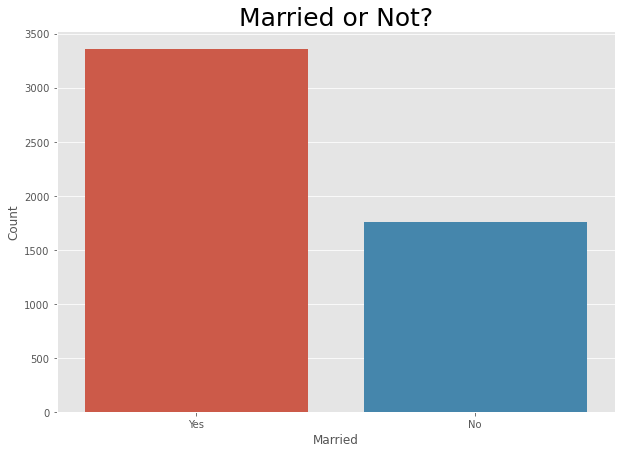

In [13]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df['ever_married'])
plt.title('Married or Not?', fontsize = 25)
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

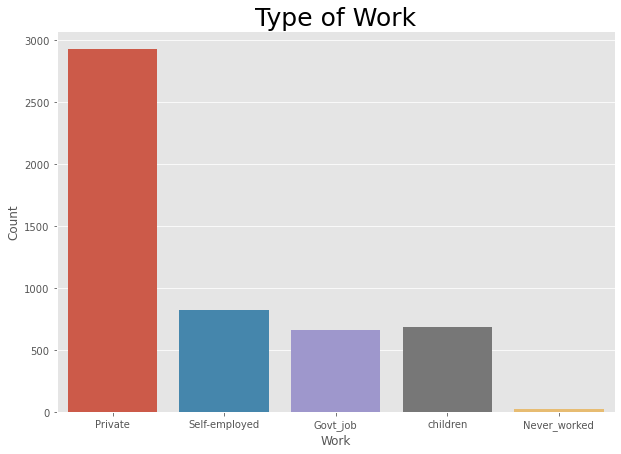

In [14]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df['work_type'])
plt.title('Type of Work', fontsize = 25)
plt.xlabel('Work')
plt.ylabel('Count')
plt.show()

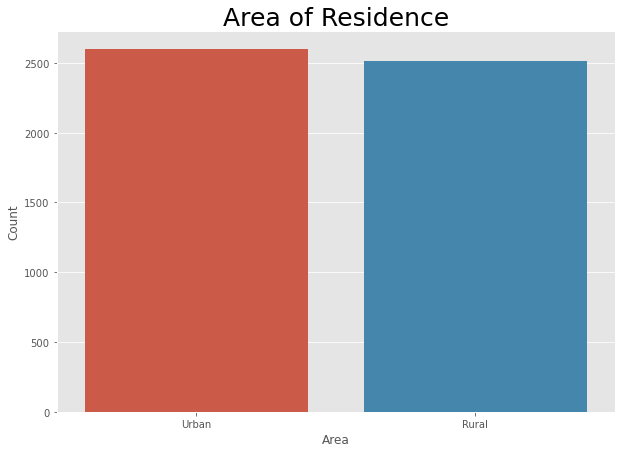

In [15]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df['Residence_type'])
plt.title('Area of Residence', fontsize = 25)
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

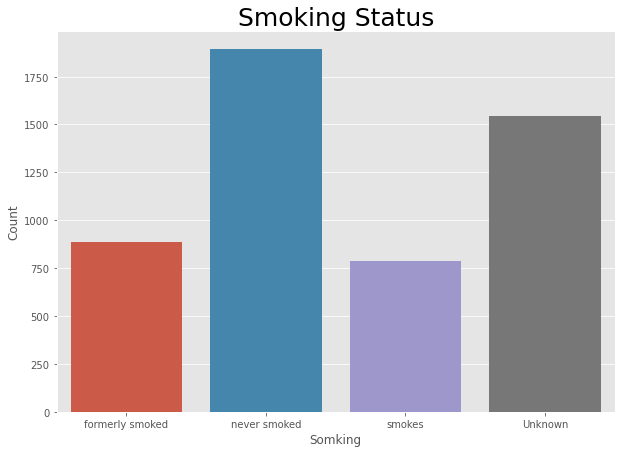

In [16]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df['smoking_status'])
plt.title('Smoking Status', fontsize = 25)
plt.xlabel('Somking')
plt.ylabel('Count')
plt.show()

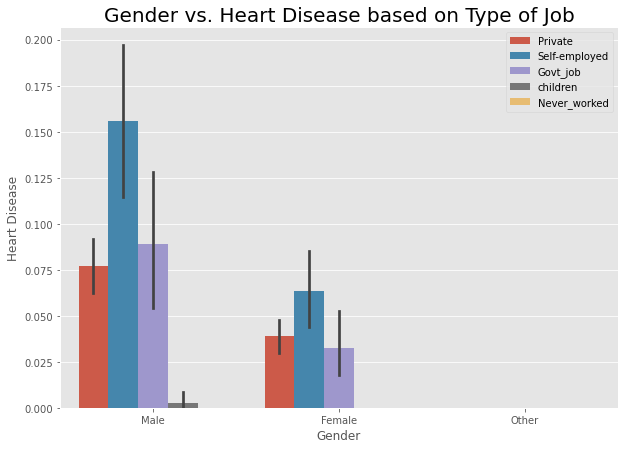

In [17]:
plt.figure(figsize = (10, 7))
sns.barplot(x = df['gender'], y = df['heart_disease'], hue = df['work_type'])
plt.legend(loc = 'upper right')
plt.title('Gender vs. Heart Disease based on Type of Job', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Heart Disease')
plt.show()

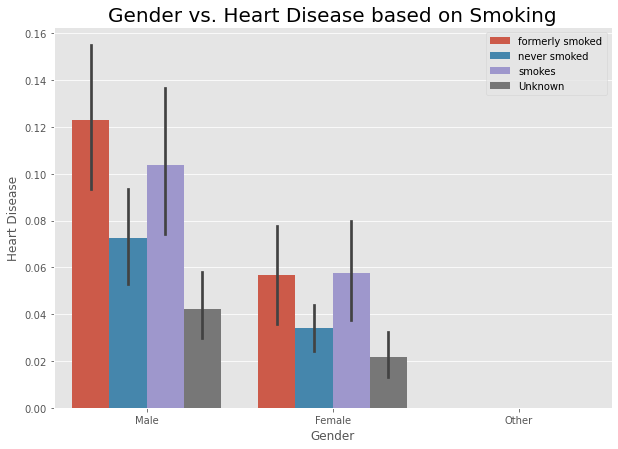

In [18]:
plt.figure(figsize = (10, 7))
sns.barplot(x = df['gender'], y = df['heart_disease'], hue = df['smoking_status'])
plt.legend(loc = 'upper right')
plt.title('Gender vs. Heart Disease based on Smoking', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Heart Disease')
plt.show()

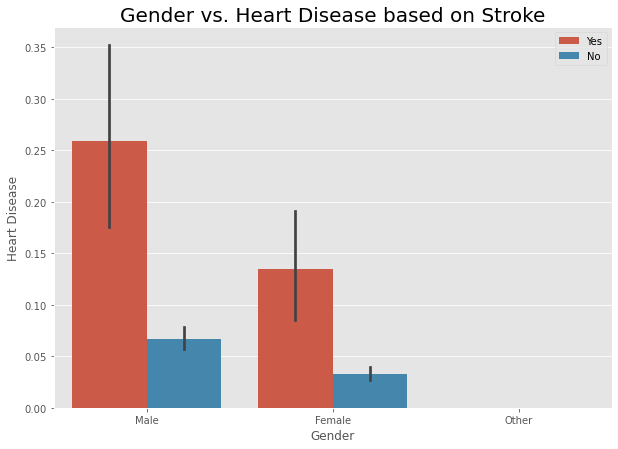

In [19]:
plt.figure(figsize = (10, 7))
sns.barplot(x = df['gender'], y = df['heart_disease'], hue = df['is_stroke'])
plt.legend(loc = 'upper right')
plt.title('Gender vs. Heart Disease based on Stroke', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Heart Disease')
plt.show()

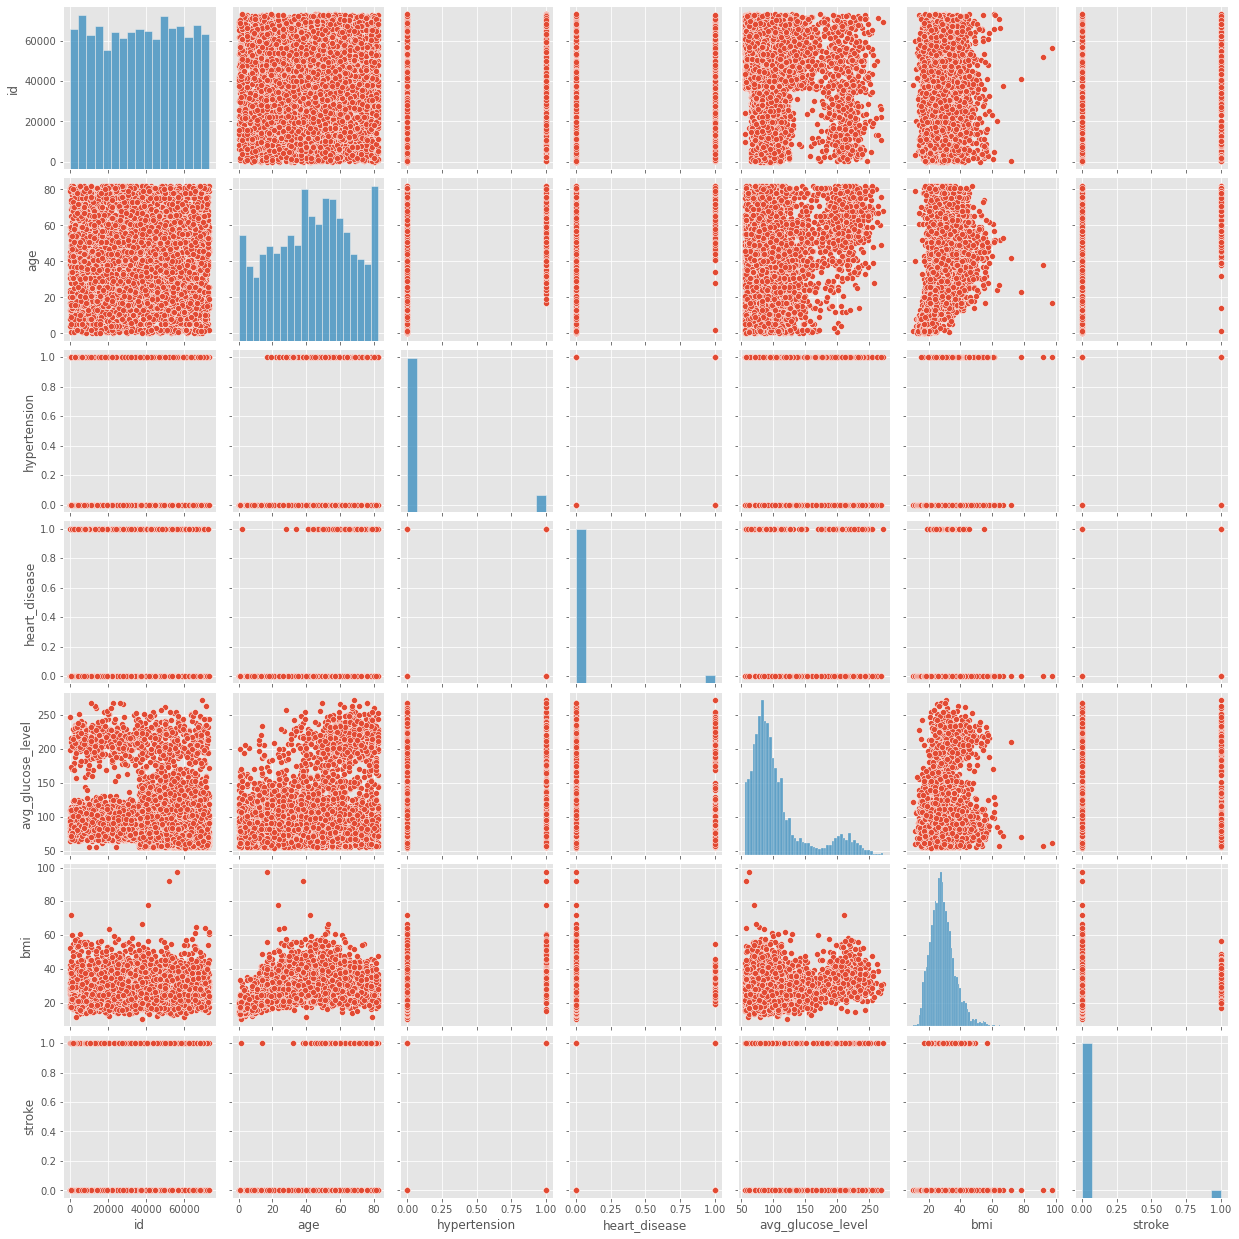

In [20]:
sns.pairplot(df)
plt.show()

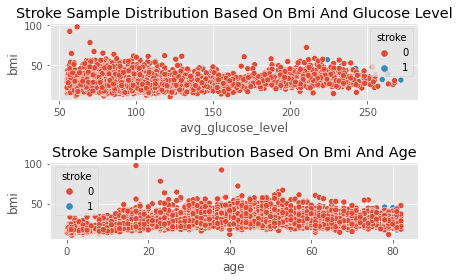

In [21]:
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'])
plt.tight_layout()
plt.show()

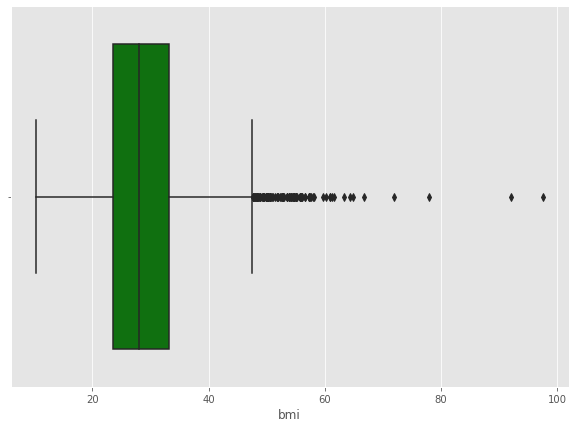

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

In [23]:
bmi_outliers=df.loc[df['bmi']>47]
bmi_outliers['bmi'].shape

(117,)

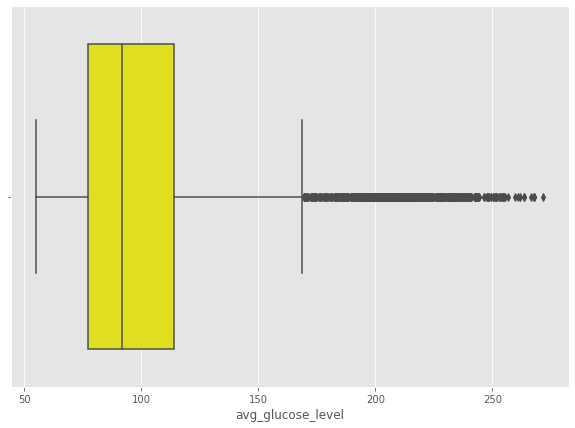

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["avg_glucose_level"],color='yellow');

In [25]:
agl_outliers=df.loc[df['avg_glucose_level']>169]
agl_outliers['avg_glucose_level'].shape

(627,)

Inferences:
1. Individuals having high glucose levels and low BMI had stroke
2. Individuals having higher age had stroke
3. Individuals suffering from extreme obesity are also suffering from Hypoglycemia
4. Average glucose level is high in higher age group
5. 75% of data comes under average glucose level of 114 but maximum glucose level here is 271 we can clearly see that these are   outliers but we can't delete these beacuse we will lose large chunk of data, let it be there because these indicates that      individuals are suffering from Hyperglycemia(>126) which is quite possible. max value = 169.5
6. Similar case is for BMI.Deleting these outliers will result in loss of heavy chunk of data. individuals having BMI more than 33 is quite possible, but individuals having BMI > 50 is a case of extreme obesity. max value = 47.5

In [26]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

In [27]:
colors = ['mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data = [go.Pie(labels = df['gender'])])
fig.update_traces(textfont_size = 20, marker = dict(colors = colors, line = dict(color = '#000000', width = 2)))
fig.update_layout(title_text = 'Gender')
fig.show()

In [28]:
colors = ['darkorange', 'lightgreen']
fig = go.Figure(data = [go.Pie(labels = df['ever_married'])])
fig.update_traces(textfont_size = 20, marker = dict(colors = colors, line = dict(color = '#000000', width = 2)))
fig.update_layout(title_text = 'Maritial Status')
fig.show()

In [29]:
colors = ['darkorange', 'lightgreen']
fig = go.Figure(data = [go.Pie(labels = df['work_type'])])
fig.update_traces(textfont_size = 20, marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout(title_text = 'Working Status')
fig.show()

In [30]:
colors = ['orange', 'seagreen', 'gold', 'red']
fig = go.Figure(data = [go.Pie(labels = df['smoking_status'])])
fig.update_traces(textfont_size = 20, marker = dict(colors = colors, line=dict(color = '#000000', width = 2)))
fig.update_layout(title_text = 'Smoking Status')
fig.show()

In [31]:
df1 = pd.DataFrame(df['smoking_status'].value_counts())
px.bar(x = df1.index, y = df1.smoking_status, height = 400, text = df1.smoking_status, labels = {'x':'Status', 'y': 'Count'},
      title = 'Smoking Status vs. Count')

In [32]:
px.bar(data_frame = df, x = 'smoking_status', y = 'heart_disease', color = 'is_stroke', height = 400,
       labels = {'smoking_status':'Smoking Status', 'heart_disease':'Heart Disease'}, title = 'Smoking Status vs. Heart Disease based on Stroke')

In [33]:
counts, bins = np.histogram(df.bmi, bins=range(0, 100, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x = bins, y = counts, labels = {'x':'BMI', 'y':'Count'}, title = 'BMI Distribution')
fig.show()

In [34]:
counts, bins = np.histogram(df.age, bins=range(0, 90, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x = bins, y = counts, labels = {'x':'Age', 'y':'Count'}, title = 'Age Distribution')
fig.show()

In [35]:
px.histogram(data_frame = df, x = 'age', color = 'is_stroke', height = 400,
             marginal = 'box', labels = {'age':'Age', 'count': 'Count'}, title = 'Age vs. Count based on Stroke')

In [36]:
px.box(x = df['bmi'], y = df['work_type'], color = df['Residence_type'], labels = {'x': 'BMI', 'y':'Work Type'},
      title = 'BMI vs. Work Type based on Residence Type')

In [37]:
px.box(x = df['bmi'], y = df['work_type'], color = df['gender'], labels = {'x': 'BMI', 'y':'Work Type'},
      title = 'BMI vs. Work Type based on Gender')

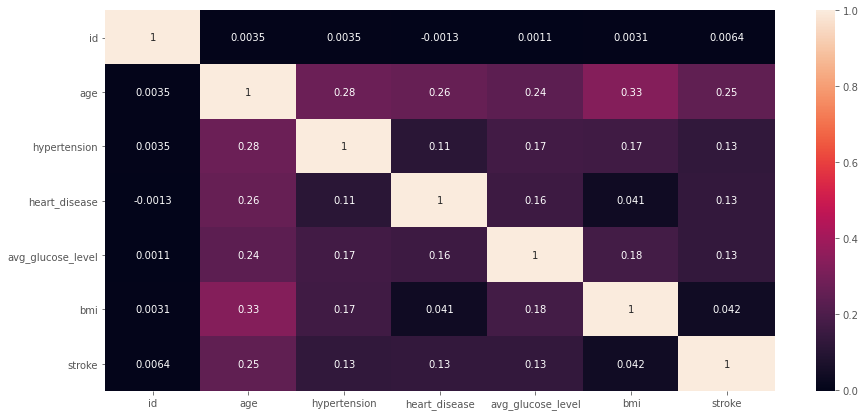

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

## Data Pre-processing

In [39]:
df.drop(['is_stroke', 'id'], axis = 1, inplace = True)
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

### Filling the missing values in BMI 

In [40]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [41]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [42]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [43]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [44]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Encoding categorical variales

In [45]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  28.893237     never smoked       1  
2          Rural             105.92  32.500000     never smoked       1  
3          Urban             171.23  34.400000           smokes       1  
4          Rural             174.12  24.000000     never smoked       1

In [46]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [47]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [48]:
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender

In [49]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1

## Model Building

### Spliting Dataset into train and test

In [50]:
X = df.drop('stroke', axis = 1)

In [51]:
X.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  
0               1             228.69  36.600000               1  
1               0             202.21  28.893237               2  
2               0             105.92  32.500000               2  
3               1             171.23  34.400000               3  
4               0             174.12  24.000000               2

In [52]:
y = df['stroke']

In [53]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [55]:
X_train

gender   age  hypertension  heart_disease  ever_married  work_type  \
335        1  11.0             0              0             0          4   
3174       0  52.0             0              0             1          2   
4181       0  27.0             0              0             1          2   
1588       0  75.0             1              0             1          2   
2186       1  13.0             0              0             0          4   
...      ...   ...           ...            ...           ...        ...   
1180       0  62.0             0              0             1          2   
3441       0  59.0             0              0             1          3   
1344       1  47.0             0              0             1          2   
4623       1  25.0             0              0             1          0   
1289       0  80.0             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  
335                0              90.69  18.6               0  
3174               1              68.88  26.1               0  
4181               1              57.46  23.0               3  
1588               1             183.00  20.8               0  
2186               0              85.87  24.3               0  
...              ...                ...   ...             ...  
1180               0              82.57  36.0               1  
3441               1              90.06  28.9               3  
1344               0              86.37  39.2               3  
4623               1             166.38  23.1               2  
1289               0              72.61  27.6               2  

[3577 rows x 10 columns]

In [56]:
y_train

335     0
3174    0
4181    0
1588    0
2186    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: stroke, Length: 3577, dtype: int64

In [57]:
X_test

gender    age  hypertension  heart_disease  ever_married  work_type  \
2413       0  58.00             0              0             1          2   
1141       1  57.00             0              0             1          2   
146        1  65.00             0              0             1          3   
3883       0   1.64             0              0             0          4   
1044       0  79.00             0              0             1          0   
...      ...    ...           ...            ...           ...        ...   
3769       1  45.00             0              0             1          0   
2195       1  16.00             0              0             0          2   
3637       1  82.00             0              0             1          2   
2485       0  14.00             0              0             0          2   
2665       0  25.00             0              0             0          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  
2413               0             100.42  39.500000               3  
1141               0              90.06  29.800000               0  
146                1              68.43  28.893237               1  
3883               1              69.89  18.100000               0  
1044               1              93.89  30.400000               2  
...              ...                ...        ...             ...  
3769               1              55.47  19.800000               3  
2195               1             134.80  22.400000               2  
3637               1             226.84  25.300000               1  
2485               0              70.54  24.400000               1  
2665               0             103.15  21.000000               3  

[1533 rows x 10 columns]

In [58]:
y_test

2413    0
1141    0
146     1
3883    0
1044    0
       ..
3769    0
2195    0
3637    0
2485    0
2665    0
Name: stroke, Length: 1533, dtype: int64

### Upsampling the data using SMOTE

In [59]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library  
#from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
#sm = SMOTEENN(random_state = 0) 
#X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train) 
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_sm, y_train_sm = oversampler.fit_resample(X_train,y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of label '1': 169
Before OverSampling, counts of label '0': 3408 

After OverSampling, the shape of train_X: (6816, 10)
After OverSampling, the shape of train_y: (6816,) 

After OverSampling, counts of label '1': 3408
After OverSampling, counts of label '0': 3408


### Normalizing the data

In [60]:
df.describe()
## High mean of glucose level and bmi will affect the model so we need to normalize our data

gender          age  hypertension  heart_disease  ever_married  \
count  5110.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean      0.414286    43.226614      0.097456       0.054012      0.656164   
std       0.493044    22.612647      0.296607       0.226063      0.475034   
min       0.000000     0.080000      0.000000       0.000000      0.000000   
25%       0.000000    25.000000      0.000000       0.000000      0.000000   
50%       0.000000    45.000000      0.000000       0.000000      1.000000   
75%       1.000000    61.000000      0.000000       0.000000      1.000000   
max       2.000000    82.000000      1.000000       1.000000      1.000000   

         work_type  Residence_type  avg_glucose_level          bmi  \
count  5110.000000     5110.000000        5110.000000  5110.000000   
mean      2.167710        0.508023         106.147677    28.893237   
std       1.090293        0.499985          45.283560     7.698018   
min       0.000000        0.000000          55.120000    10.300000   
25%       2.000000        0.000000          77.245000    23.800000   
50%       2.000000        1.000000          91.885000    28.400000   
75%       3.000000        1.000000         114.090000    32.800000   
max       4.000000        1.000000         271.740000    97.600000   

       smoking_status       stroke  
count     5110.000000  5110.000000  
mean         1.376908     0.048728  
std          1.071534     0.215320  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          2.000000     0.000000  
75%          2.000000     0.000000  
max          3.000000     1.000000

In [61]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [62]:
X_train_std=std.fit_transform(X_train_sm)
X_test_std=std.transform(X_test)

### Saving scaler object

In [63]:
import pickle
import os
scaler_path=os.path.join('scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [64]:
X_train_std

array([[ 1.18607743, -1.97557507, -0.47667979, ..., -0.47951263,
        -1.5762826 , -1.40828226],
       [-0.84311528, -0.13355392, -0.47667979, ..., -0.8776694 ,
        -0.4833273 , -1.40828226],
       [-0.84311528, -1.25673755, -0.47667979, ..., -1.08614947,
        -0.93508215,  1.49021353],
       ...,
       [-0.84311528,  0.49542892, -0.47667979, ..., -0.28308132,
        -0.07627622, -1.40828226],
       [-0.84311528,  1.03455706, -0.47667979, ..., -0.13667063,
         0.20159136,  0.52404827],
       [ 1.18607743,  1.21426644, -0.47667979, ..., -0.24237112,
        -0.64362741,  0.52404827]])

In [65]:
X_test_std

array([[-0.84311528,  0.13601016, -0.47667979, ..., -0.30188469,
         1.46941951,  1.49021353],
       [ 1.18607743,  0.09108281, -0.47667979, ..., -0.49101372,
         0.05586399, -1.40828226],
       [ 1.18607743,  0.45050157, -0.47667979, ..., -0.88588447,
        -0.07627622, -0.442117  ],
       ...,
       [ 1.18607743,  1.21426644, -0.47667979, ...,  2.00600062,
        -0.5999092 , -0.442117  ],
       [-0.84311528, -1.84079304, -0.47667979, ..., -0.84736494,
        -0.73106383, -0.442117  ],
       [-0.84311528, -1.34659224, -0.47667979, ..., -0.25204664,
        -1.2265369 ,  1.49021353]])

### Logistics regression

In [66]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 300)
log.fit(X_train_sm, y_train_sm)

y_pred_log = log.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
print("The Training Score of Logistic Regression is: {}%".format(log.score(X_train_sm, y_train_sm)*100))
print("The Accuracy Score of Logistic Regression is: {}%".format(accuracy_score(y_test, y_pred_log)*100))
print("The Confusion Matrix for Logistic Regression is: \n{}\n".format(confusion_matrix(y_test, y_pred_log)))
print('\n')
print(classification_report(y_test, y_pred_log))

The Training Score of Logistic Regression is: 77.11267605633803%
The Accuracy Score of Logistic Regression is: 74.36399217221134%
The Confusion Matrix for Logistic Regression is: 
[[1078  375]
 [  18   62]]



              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1453
           1       0.14      0.78      0.24        80

    accuracy                           0.74      1533
   macro avg       0.56      0.76      0.54      1533
weighted avg       0.94      0.74      0.81      1533



### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train_sm, y_train_sm)

y_pred_dt = dt.predict(X_test)

In [69]:
print("The Training Score of Decision Tree is: {}%".format(dt.score(X_train_sm, y_train_sm)*100))
print("The Accuracy Score of Decision Tree is: {}%".format(accuracy_score(y_test, y_pred_dt)*100))
print("The Confusion Matrix for Decision Tree is: \n{}\n".format(confusion_matrix(y_test, y_pred_dt)))
print('\n')
print(classification_report(y_test, y_pred_dt))

The Training Score of Decision Tree is: 100.0%
The Accuracy Score of Decision Tree is: 91.32420091324201%
The Confusion Matrix for Decision Tree is: 
[[1392   61]
 [  72    8]]



              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1453
           1       0.12      0.10      0.11        80

    accuracy                           0.91      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.91      0.91      0.91      1533



### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy')
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X_test)

In [71]:
print("The Training Score of Random Forest is: {}%".format(rf.score(X_train_sm, y_train_sm)*100))
print("The Accuracy Score of Random Forest is: {}%".format(accuracy_score(y_test, y_pred_rf)*100))
print("The Confusion Matrix for Random Forest is: \n{}\n".format(confusion_matrix(y_test, y_pred_rf)))
print('\n')
print(classification_report(y_test, y_pred_rf))

The Training Score of Random Forest is: 100.0%
The Accuracy Score of Random Forest is: 94.19439008480104%
The Confusion Matrix for Random Forest is: 
[[1441   12]
 [  77    3]]



              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1453
           1       0.20      0.04      0.06        80

    accuracy                           0.94      1533
   macro avg       0.57      0.51      0.52      1533
weighted avg       0.91      0.94      0.92      1533



### Neural Network

In [72]:
# mlp = MLPClassifier(hidden_layer_sizes=(1000,300, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
mlp=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)
mlp.fit(X_train_sm, y_train_sm)
#mlp_pred= mlp.predict(X_test)

mlp_score = mlp.score(X_train_sm, y_train_sm)
mlp_test = mlp.score(X_test, y_test)


y_pred_nn =mlp.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred_nn)
print('Training Score',mlp_score)
print('Testing Score \n',mlp_test)
print(cm)

Iteration 1, loss = 1.27266091
Iteration 2, loss = 0.54544998
Iteration 3, loss = 0.51621780
Iteration 4, loss = 0.51993682
Iteration 5, loss = 0.51349555
Iteration 6, loss = 0.50102700
Iteration 7, loss = 0.49865819
Iteration 8, loss = 0.48369725
Iteration 9, loss = 0.50187109
Iteration 10, loss = 0.49075781
Iteration 11, loss = 0.47359045
Iteration 12, loss = 0.47252699
Iteration 13, loss = 0.48935945
Iteration 14, loss = 0.47129739
Iteration 15, loss = 0.46031407
Iteration 16, loss = 0.45650693
Iteration 17, loss = 0.46017692
Iteration 18, loss = 0.45397684
Iteration 19, loss = 0.45182683
Iteration 20, loss = 0.45653376
Iteration 21, loss = 0.44591074
Iteration 22, loss = 0.46250877
Iteration 23, loss = 0.45501239
Iteration 24, loss = 0.45414705
Iteration 25, loss = 0.44704876
Iteration 26, loss = 0.44961897
Iteration 27, loss = 0.44431202
Iteration 28, loss = 0.44579628
Iteration 29, loss = 0.44043596
Iteration 30, loss = 0.42845669
Iteration 31, loss = 0.43422149
Iteration 32, los

90.47619047619048
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1453
           1       0.11      0.11      0.11        80

    accuracy                           0.90      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.91      0.90      0.91      1533



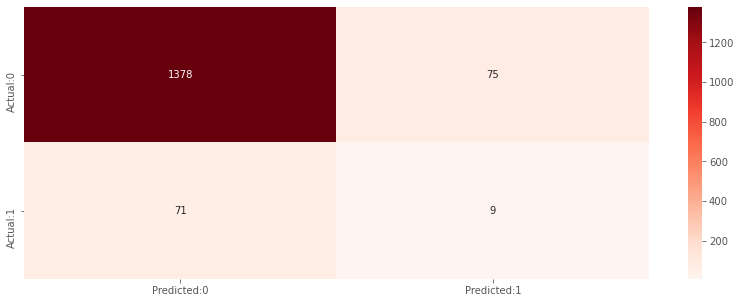

In [74]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred_nn)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");
print(accuracy_score(y_test,y_pred_nn)*100)
print(classification_report(y_test, y_pred_nn))

### XGboost

The Training Score of XGboost is: 87.30927230046949%
The Accuracy Score of XGboost is: 79.45205479452055%
The Confusion Matrix for XGboost is: 
[[1167  286]
 [  29   51]]



              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1453
           1       0.15      0.64      0.24        80

    accuracy                           0.79      1533
   macro avg       0.56      0.72      0.56      1533
weighted avg       0.93      0.79      0.85      1533

0.7945205479452054


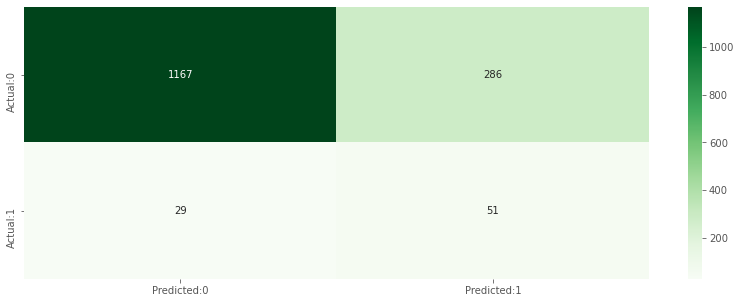

In [93]:
xgb = GradientBoostingClassifier(random_state = 0)
xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(X_test)


print("The Training Score of XGboost is: {}%".format(xgb.score(X_train_sm, y_train_sm)*100))
print("The Accuracy Score of XGboost is: {}%".format(accuracy_score(y_test, y_pred_xgb)*100))
print("The Confusion Matrix for XGboost is: \n{}\n".format(confusion_matrix(y_test, y_pred_xgb)))
print('\n')
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test,y_pred_xgb)

plt.figure(figsize=(14,5))

conf_matrix = pd.DataFrame(data=cm_xgb,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred_xgb))

In [88]:
TN=cm_xgb[0,0]
TP=cm_xgb[1,1]
FN=cm_xgb[1,0]
FP=cm_xgb[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [89]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.7945205479452054 
 The Missclassification = 1-Accuracy =                   0.20547945205479456 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.6375 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.8031658637302134 



In [90]:
LR_F1  = f1_score(y_test,y_pred_log)
DT_F1  = f1_score(y_test,y_pred_dt)
RF_F1  = f1_score(y_test,y_pred_rf)
XGB_F1 = f1_score(y_test,y_pred_xgb)
NN_F1  = f1_score(y_test,y_pred_nn)

In [91]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['Logistic regression','Decision Tree','Random forest','XGboost','Neural Network'],y=[LR_F1,DT_F1,RF_F1,XGB_F1,NN_F1]))
fig.update_layout(title='F1 Score Of Our Model On Original Data',xaxis_title='Model',yaxis_title='F1 Score')
fig.show()

## Saving the Model

In [92]:
import joblib
model_path=os.path.join('xg.sav')
joblib.dump(xgboost,model_path)

['xg.sav']